In [44]:
import adi
import numpy as np
import scipy
import sys
import h5py
import time
import matplotlib.pyplot as plt

fc = 90e6
fs = 50e6
chunk_size = 65536*16
g1 = 30
NFFT = 1024

sdr = adi.ad9364("ip:192.168.2.5") #Note this change based on https://github.com/analogdevicesinc/pyadi-iio/issues/521

sdr.sample_rate = int(fs)
sdr.rx_rf_bandwidth = int(fs)
sdr.rx_lo = int(fc)
sdr.rx_buffer_size = int(chunk_size)
sdr.gain_control_mode_chan0 = "manual"
sdr.rx_hardwaregain_chan0 = int(g1)
samples = sdr.rx() # Dummy rx

freq = np.linspace((fc-fs/2), fc+(fs/2), NFFT)

auto11 = np.zeros(NFFT, dtype=np.float32)

a = np.array(sdr.rx())
Nsamp = a.shape[0]

for j in range(int(Nsamp/NFFT)):
    c1_fft = np.fft.fft(a[j*NFFT:(j+1)*NFFT])
    auto11 = auto11 + np.abs(c1_fft)**2

Nnorm = int(Nsamp/NFFT)

auto11 = np.fft.fftshift(auto11/Nnorm)



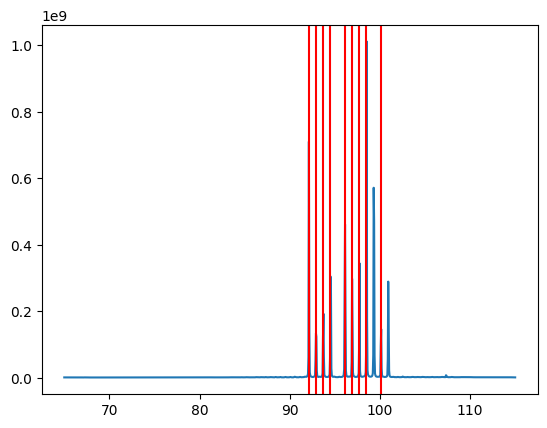

In [45]:
plt.figure()
plt.plot(freq/1e6, auto11)
# plt.xlim(90,100)
for fm_freq in [92.1, 92.9, 93.7, 94.5, 96.1, 96.9, 97.7, 98.5, 100.1]:
    plt.axvline(fm_freq, color='red')